      j  s  r  b  total  pct
roll                        
1     4  4  1  2     11  5.3
2     3  5  2  1     11  5.3
3     1  2  5  5     13  6.3
4     1  5  1  7     14  6.8
5     2  3  1  5     11  5.3
6     1  2  1  0      4  1.9
7     4  4  0  2     10  4.8
8     3  2  2  3     10  4.8
9     2  2  3  3     10  4.8
10    2  1  2  2      7  3.4
11    3  1  3  2      9  4.3
12    1  4  3  3     11  5.3
13    2  2  1  2      7  3.4
14    2  1  1  6     10  4.8
15    6  4  0  4     14  6.8
16    2  3  3  1      9  4.3
17    3  4  3  3     13  6.3
18    2  4  5  1     12  5.8
19    3  1  2  2      8  3.9
20    3  5  2  3     13  6.3


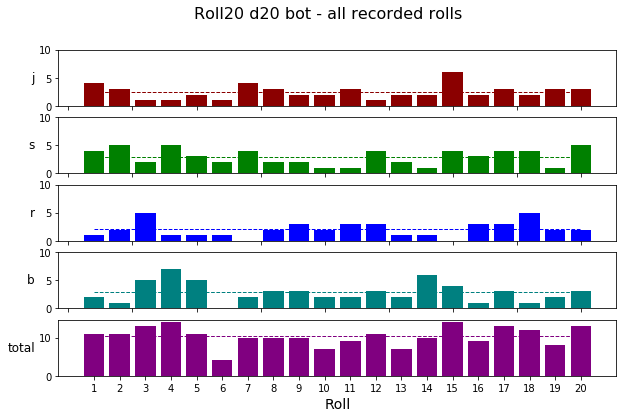

       under10  over10  total  u10_pct  o10_pct   mean  stdev   var
name                                                               
j           23      27     50     46.0     54.0   2.50   1.24  1.53
s           30      29     59     50.8     49.2   2.95   1.43  2.05
r           18      23     41     43.9     56.1   2.05   1.39  1.94
b           30      27     57     52.6     47.4   2.85   1.79  3.19
total      101     106    207     48.8     51.2  10.35   2.56  6.56


In [5]:
# Get packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# USER INPUT 
filename = 'rolls-overall-roll20.csv'
figtitle = 'Roll20 d20 bot - all recorded rolls'

# Get & edit data
df = pd.read_csv(filename)
df = df.fillna(0)
df['total'] = df['j'] + df['s'] + df['r'] + df['b']
df['pct'] = round((df['total'] / df['total'].sum()) * 100, 1)
print(df.set_index('roll'))

# Graph results
colors = ['darkred', 'green', 'blue', 'teal', 'purple']

fig, axs = plt.subplots(5,1, figsize=(10,6))

for i in range(1, 6):
    axs[i-1].bar(df['roll'], df[df.columns[i]], color = colors[i-1])
    #axs[i-1].yaxis.set_ticklabels([])
    axs[i-1].set_ylabel(df.columns[i], rotation = 0, fontsize = 12, 
                        ha = 'right', va = 'center')
    
    axs[i-1].plot(df['roll'], [(df[df.columns[i]].sum() / 20)] * 20, 
                  color = colors[i-1], 
                  linestyle = 'dashed',
                  linewidth = 1)
    
    if i != 5:
        axs[i-1].xaxis.set_ticklabels([])
        axs[i-1].set_ylim(0,10)
        
fig.suptitle(figtitle, size = 16)
plt.xticks(np.arange(1, 21, 1.0))
plt.xlabel('Roll', size = 14)
plt.show()

# Calc totals
summary = []
for i in range(1,6):
    name = df.columns[i]
    col = df[name]
    colval = col.values.tolist()
    under10 = sum(colval[0:10])
    over10 = sum(colval[10:21])
    total = sum(colval)
    under10_pct = under10/total*100
    over10_pct = over10/total*100
    m = col.mean()
    sd = col.std()
    v = col.var()
    lst = [name, int(under10), int(over10), int(total), round(under10_pct, 1), round(over10_pct, 1),
           m, round(sd, 2), round(v, 2)]
    summary.append(lst)
    
summary = pd.DataFrame(summary)
summary.columns = ['name', 'under10', 'over10', 'total', 'u10_pct', 'o10_pct', 'mean', 'stdev', 'var']
print(summary.set_index('name'))